# What Factors Influence Home Price 

In [1]:
#Importing Packages
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import linear_rainbow, het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv("data/kc_house_data.csv")
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
# Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution 
# This is excluding NaN values.
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [4]:
# Beginning the clean up of the dataframe
data = data.reset_index()
columns = data.columns.to_list()
columns

['index',
 'id',
 'date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [5]:
data.columns = data.columns.str.replace(' ', '')

In [6]:
# Dropping unnecessary series from the dataframe
data = data.drop(columns=['index', 'id'])

In [7]:
# Placing the Dependent Variable on the far left of the dataframe
cols = list(data.columns)
cols = [cols[1]] + cols[:1] + cols[2:]
data = data[cols]

In [8]:
# Checking Missing Data by Percentage 
data.isna().mean().round(4) * 100

price             0.00
date              0.00
bedrooms          0.00
bathrooms         0.00
sqft_living       0.00
sqft_lot          0.00
floors            0.00
waterfront       11.00
view              0.29
condition         0.00
grade             0.00
sqft_above        0.00
sqft_basement     0.00
yr_built          0.00
yr_renovated     17.79
zipcode           0.00
lat               0.00
long              0.00
sqft_living15     0.00
sqft_lot15        0.00
dtype: float64

In [9]:
# Checking dtypes against the initial info and describe information provided
display(data.shape)
data.dtypes

(21597, 20)

price            float64
date              object
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

### Need to check on possibly modification of data types for the following columns:

1.) sqft_basement

2.) date

In [10]:
errors = []
for idx in data.index:
    try: 
        float(data.sqft_basement[idx])
    except:
        errors.append(idx)

In [11]:
data.iloc[errors].sqft_basement.value_counts()

?    454
Name: sqft_basement, dtype: int64

#### I can replace nan's or missing data with the mean, for the following columns: price, sqft_living, sqft_lot, sqft_above, sqft_living15 and sqft_lot 15

In [12]:
data['sqft_basement'] = pd.to_numeric(data.sqft_basement, errors="coerce")
data['yr_renovated'] = pd.to_numeric(data.yr_renovated, errors="coerce")
data['price'] = pd.to_numeric(data.price, errors="coerce")
data['bathrooms'] = pd.to_numeric(data.bathrooms, errors="coerce")
data['floors'] = pd.to_numeric(data.floors, errors="coerce")
data['waterfront'] = pd.to_numeric(data.waterfront, errors="coerce")
data['view'] = pd.to_numeric(data.view, errors="coerce")

In [13]:
data['bedrooms'] = data['bedrooms'].astype(float)
data['sqft_living'] = data['sqft_living'].astype(float)
data['sqft_lot'] = data['sqft_lot'].astype(float)
data['condition'] = data['condition'].astype(float)
data['grade'] = data['grade'].astype(float)
data['sqft_above'] = data['sqft_above'].astype(float)
data['sqft_living15'] = data['sqft_living15'].astype(float)
data['sqft_lot15'] = data['sqft_lot15'].astype(float)

In [14]:
column_means = data.mean()
data = data.fillna(column_means)

In [15]:
data.dtypes

price            float64
date              object
bedrooms         float64
bathrooms        float64
sqft_living      float64
sqft_lot         float64
floors           float64
waterfront       float64
view             float64
condition        float64
grade            float64
sqft_above       float64
sqft_basement    float64
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15    float64
sqft_lot15       float64
dtype: object

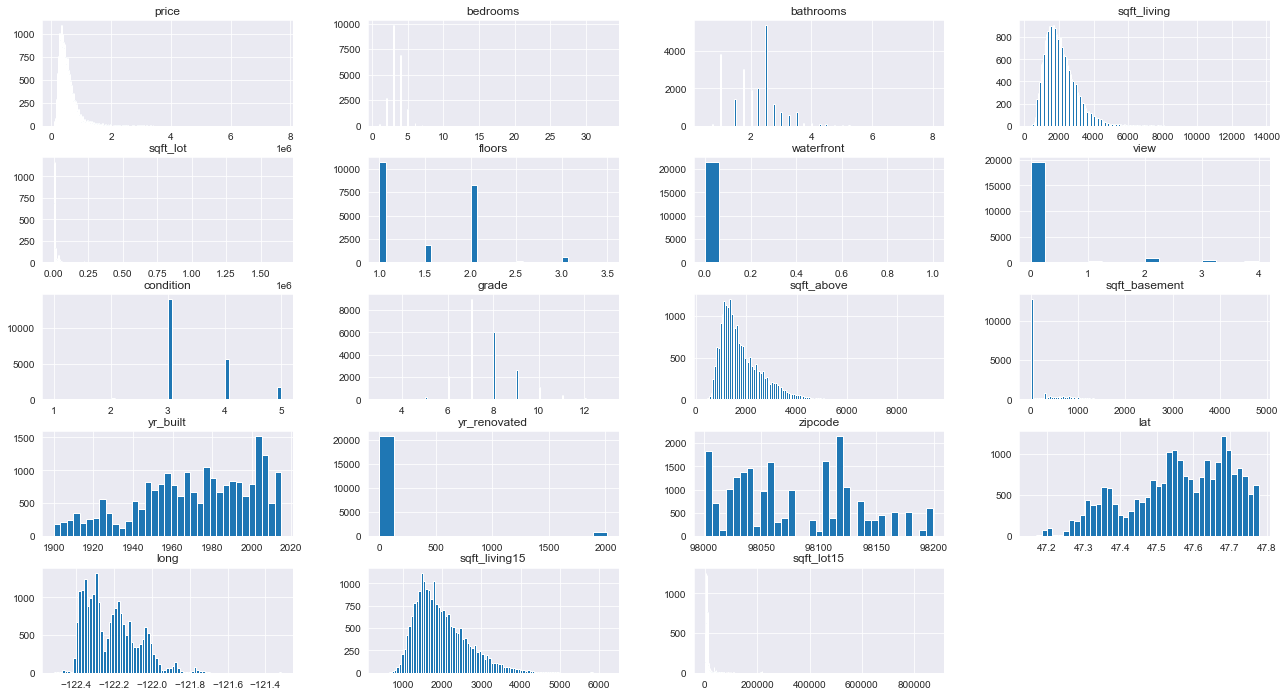

In [16]:
data.hist(figsize  = [22, 12], bins = 'auto');

In [17]:
def bootstrap(df,column,target,sample_size=300):
    unique = df[column].unique()
    for val in unique:
        samples = []
        frame = df[df[column] == val]
        for i in range(sample_size):
            sample = np.random.choice(frame[target], size = frame.shape[0], replace = True)
            samples.append(sample.mean())
        plt.hist(samples, label = val, alpha =.7)
    plt.legend();

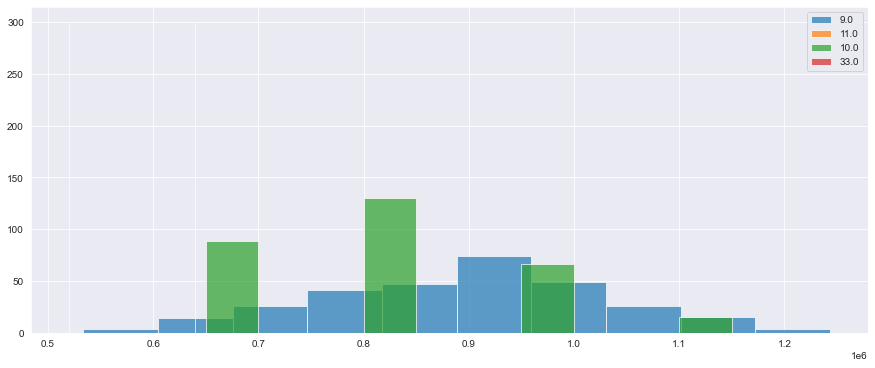

In [18]:
plt.figure(figsize = (15,6))
frame = data[data.bedrooms>8]
bootstrap(frame,'bedrooms','price')

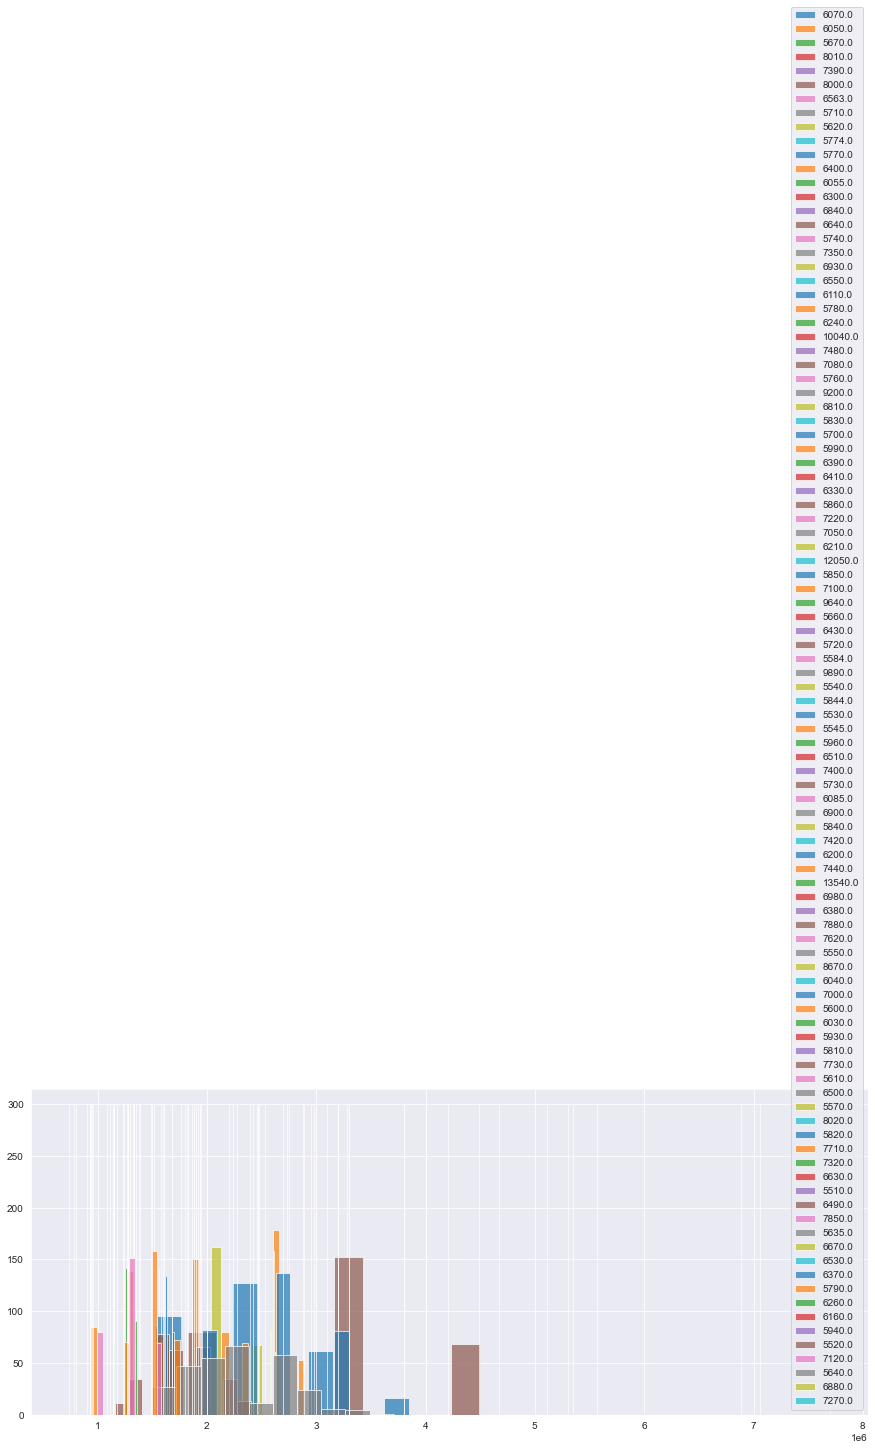

In [19]:
plt.figure(figsize = (15,6))
frame = data[data.sqft_living>5500]
bootstrap(frame,'sqft_living','price')

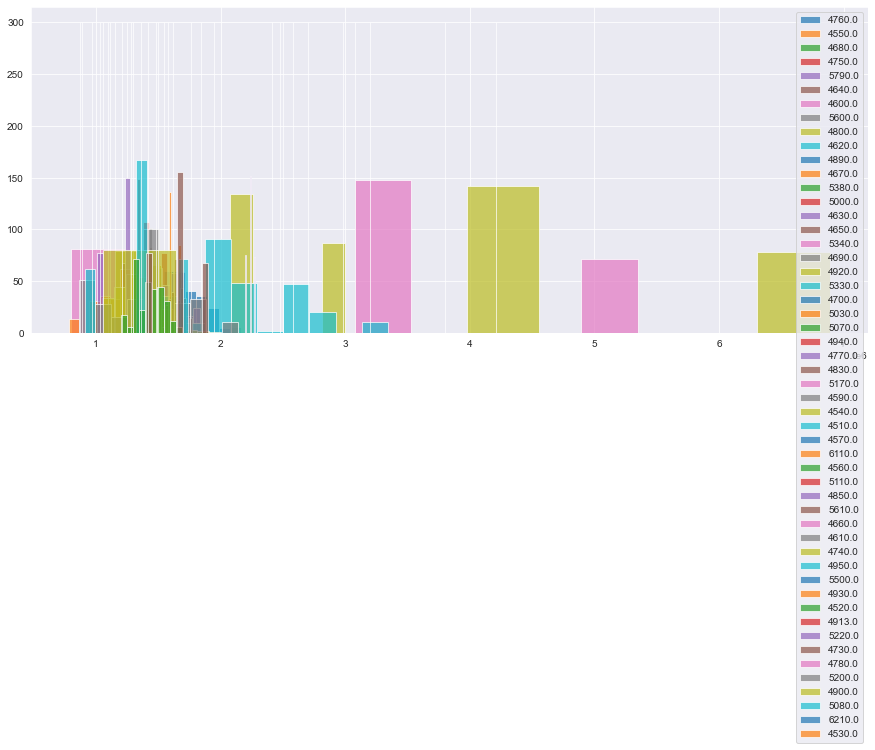

In [20]:
plt.figure(figsize = (15,6))
frame = data[data.sqft_living15>4500]
bootstrap(frame,'sqft_living15','price')

# Feature Engineering

In [21]:
#Convert date column to 2 separate columns for month and year
date = data['date'].str.split('/', expand=True)
data['month_sold'] = date[0].astype('int64')
data['year_sold'] = date[2].astype('int64')
#Drop original date column
data.drop(columns=['date'], axis=1, inplace=True)

In [22]:
data['age'] = data.year_sold - data.yr_built
data = data.drop(columns=['yr_built'], axis=1)

In [23]:
# Let's change yr_renovated to a binary column? Since it's not manadatory to have renovated your home

data.yr_renovated.fillna(0.0, inplace=True)
#Create renovated column
data['renovated'] = data.year_sold - data.yr_renovated
#Replace any values less than 10 with 1, and any values over 10 with 0renovated = df.renovated.values
age = data.age.values
values = np.where(data.renovated <= 10, 1, 0)
data['renovated'] = np.where(age <= 5, 1, values)
#Drop yr_renovated column
data.drop(columns=['yr_renovated'], axis=1, inplace=True)

In [24]:
# sqft_livingsquare: the footage of the home
# sqft_lotsquare: the footage of the lot

# sqft_above: square footage of house apart from basement
# sqft_basement: square footage of the basement

# sqft_above + sqft_basement = sqft_livingsquare
data['yard_space'] = data.sqft_lot - data.sqft_living

# Final Model 

#### Logarithmic transformation is a convenient means of transforming a highly skewed variable into a more normalized dataset. 
#### When modeling variables with non-linear relationships, the chances of producing errors may also be skewed negatively

#### Scaling can be used when we want features to be compared on the same scale for our algorithm. And, when all features are in the same scale, it also helps algorithms to understand the relative relationship better.


In [25]:
def scale_column(x):
    return (x-x.mean())/x.std()

In [26]:
data['price_log'] = np.log(data['price'])
data['sqft_living_log'] = np.log(data['sqft_living'])
data['sqft_lot15_log'] = np.log(data['sqft_lot15'])
data['sqft_living15_log'] = np.log(data['sqft_living15'])

In [27]:
data['bedrooms_scaled'] = scale_column(data.bedrooms)
data['bathrooms_scaled'] = scale_column(data.bathrooms)
data['floors_scaled'] = scale_column(data.floors)
data['waterfront_scaled'] = scale_column(data.waterfront)
data['view_scaled'] = scale_column(data.view)
data['condition_scaled'] = scale_column(data.condition)
data['grade_scaled'] = scale_column(data.grade)
data['age_scaled'] = scale_column(data.age)
data['year_sold_scaled'] = scale_column(data.year_sold)
data['renovated_scaled'] = scale_column(data.renovated)
data['month_sold_scaled'] = scale_column(data.month_sold)

In [28]:
model1_cols =  ['price_log',
                'sqft_living_log',
                'sqft_lot15_log',
                'sqft_living15_log',
                'bedrooms_scaled',
                'bathrooms_scaled',
                'floors_scaled',
                'waterfront_scaled',
                'view_scaled',
                'condition_scaled',
                'grade_scaled',
                'age_scaled',
                'year_sold_scaled',
                'renovated_scaled',
                'month_sold_scaled']
model1 = data[model1_cols]

In [29]:
# Removing Outliers

model1 = model1[model1.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]

In [30]:
display(model1.shape)
model1.head()

(18464, 15)

,price_log,sqft_living_log,sqft_lot15_log,sqft_living15_log,bedrooms_scaled,bathrooms_scaled,floors_scaled,waterfront_scaled,view_scaled,condition_scaled,grade_scaled,age_scaled,year_sold_scaled,renovated_scaled,month_sold_scaled
0,12.309982,7.073270,8.639411,7.200425,-0.402894,-1.451039,-0.915531,-2.679086e-15,-0.305875,-0.629972,-0.560787,0.533634,-0.690651,-0.289674,1.099828
1,13.195614,7.851661,8.941022,7.432484,-0.402894,0.174482,0.937409,-9.273482e-02,-0.305875,-0.629972,-0.560787,0.669794,-0.690651,-0.289674,1.741870
2,12.100712,6.646391,8.994917,7.908387,-1.482459,-1.451039,-0.915531,-9.273482e-02,-0.305875,-0.629972,-1.413157,1.316552,1.447842,-0.289674,-1.468340
3,13.311329,7.580700,8.517193,7.215240,0.676671,1.149794,-0.915531,-9.273482e-02,-0.305875,2.444371,-0.560787,0.193235,-0.690651,-0.289674,1.741870
4,13.142166,7.426549,8.923058,7.495542,-0.402894,-0.150622,-0.915531,-9.273482e-02,-0.305875,-0.629972,0.291583,-0.521603,1.447842,-0.289674,-1.468340


# Looking at the Correlation

In [31]:
model1_corr = model1.corr()
model1_corr

,price_log,sqft_living_log,sqft_lot15_log,sqft_living15_log,bedrooms_scaled,bathrooms_scaled,floors_scaled,waterfront_scaled,view_scaled,condition_scaled,grade_scaled,age_scaled,year_sold_scaled,renovated_scaled,month_sold_scaled
price_log,1.000000,0.624715,0.080537,0.580519,0.318856,0.485477,0.296610,-0.002842,0.204249,0.056357,0.650312,-0.045784,0.008452,NaN,-0.017235
sqft_living_log,0.624715,1.000000,0.304851,0.737053,0.631460,0.740552,0.362365,-0.002919,0.146886,-0.036737,0.713281,-0.351794,-0.028734,NaN,0.012564
sqft_lot15_log,0.080537,0.304851,1.000000,0.385183,0.210696,0.074921,-0.247542,-0.009255,0.036841,0.082138,0.189649,-0.054676,-0.014485,NaN,0.001401
sqft_living15_log,0.580519,0.737053,0.385183,1.000000,0.412260,0.564282,0.284666,-0.005753,0.171378,-0.092028,0.686701,-0.349330,-0.016801,NaN,0.000061
bedrooms_scaled,0.318856,0.631460,0.210696,0.412260,1.000000,0.495963,0.168450,0.000066,0.053583,0.038732,0.344335,-0.160797,-0.005218,NaN,-0.001431
bathrooms_scaled,0.485477,0.740552,0.074921,0.564282,0.495963,1.000000,0.501938,-0.003068,0.098478,-0.107777,0.630326,-0.531755,-0.027298,NaN,0.009593
floors_scaled,0.296610,0.362365,-0.247542,0.284666,0.168450,0.501938,1.000000,-0.002592,0.003446,-0.250172,0.457097,-0.460706,-0.020758,NaN,0.009605
waterfront_scaled,-0.002842,-0.002919,-0.009255,-0.005753,0.000066,-0.003068,-0.002592,1.000000,0.013776,0.000335,-0.006637,0.003904,0.000903,NaN,-0.003877
view_scaled,0.204249,0.146886,0.036841,0.171378,0.053583,0.098478,0.003446,0.013776,1.000000,0.030788,0.139902,0.055717,0.009949,NaN,-0.009086
condition_scaled,0.056357,-0.036737,0.082138,-0.092028,0.038732,-0.107777,-0.250172,0.000335,0.030788,1.000000,-0.148168,0.348101,-0.052155,NaN,0.025844


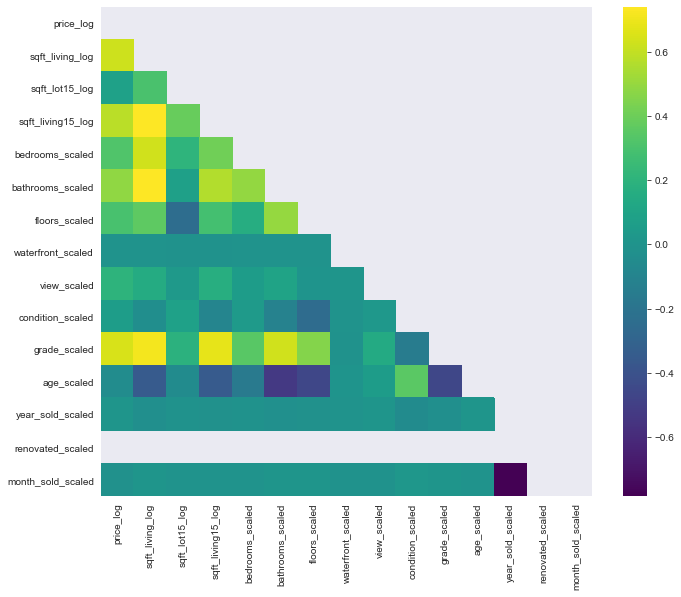

In [32]:
mask = np.triu(np.ones_like(model1_corr, dtype=np.bool))

fig1, ax1 = plt.subplots(figsize=(11, 9))
sns.heatmap(model1_corr, mask=mask, ax=ax1, cmap="viridis");

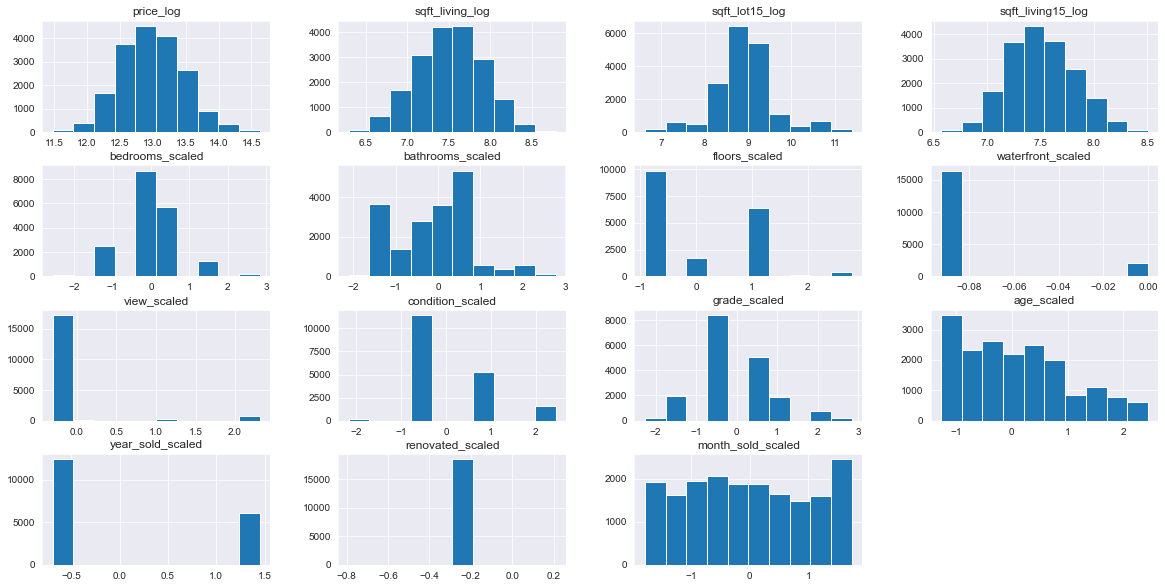

In [33]:
model1.hist(figsize  = [20, 10]); 

# Final Linear Regression Model

In [34]:
fsm_df1 = model1.copy()
fsm_df1.dropna(inplace=True)

In [35]:
fsm1 = ols(formula ="price_log ~ sqft_living_log + sqft_lot15_log + sqft_living15_log + bedrooms_scaled + bathrooms_scaled + floors_scaled + waterfront_scaled + view_scaled + condition_scaled + grade_scaled + age_scaled + year_sold_scaled + renovated_scaled + month_sold_scaled", data = fsm_df1)
fsm_results1 = fsm1.fit()

In [36]:
fsm_results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     2189.
Date:                Fri, 14 May 2021   Prob (F-statistic):               0.00
Time:                        19:26:08   Log-Likelihood:                -3954.4
No. Observations:               18464   AIC:                             7937.
Df Residuals:                   18450   BIC:                             8046.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             8.3784      0.088     94.702      0.000       8.205       8.552
sqft_living_log       0.3112      0.012     25.874      0.000       0.288       0.335
sqft_lot15_log       -0.0949      0.004    -24.176      0.000      -0.103      -0.087
sqft_living15_log     0.3248      0.012     27.716      0.000       0.302       0.348
bedrooms_scaled      -0.0337      0.003    -10.592      0.000      -0.040      -0.027
bathrooms_scaled      0.0555      0.004     13.027      0.000       0.047       0.064
floors_scaled         0.0210      0.003      6.877      0.000       0.015       0.027
waterfront_scaled    -0.0120      0.076     -0.158      0.874      -0.161       0.137
view_scaled           0.0361      0.004      8.907      0.000       0.028       0.044
condition_scaled      0.0299      0.002     12.558      0.000       0.025       0.035
grade_scaled          0.2389      0.004     59.219      0.000       0.231       0.247
age_scaled            0.1799      0.003     58.327      0.000       0.174       0.186
year_sold_scaled      0.0163      0.004      4.595      0.000       0.009       0.023
renovated_scaled     -2.4270      0.026    -94.702      0.000      -2.477      -2.377
month_sold_scaled -2.906e-05      0.004     -0.008      0.993      -0.007       0.007
==============================================================================
Omnibus:                       58.403   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.093
Skew:                          -0.123   Prob(JB):                     8.93e-14
Kurtosis:                       3.132   Cond. No.                     9.13e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.29e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#  Final, Evaluation:

We are explaining about roughly 60.6% of the variance in home prices, with our 14 features so far and it's statistically significant.

According to our model:

 - For each additional 1% increase in footage of the home's, we expect a home's price to increase by a percentage change of 0.3112.
 
 
 - For each additional 1% increase in square footage of the land lots of the nearest 15 neighbors, we expect a home's price to decrease by a percentage change of -0.0949.
 
 
 - For each additional 1% increase in the square footage of interior housing living space for the nearest 15 neighbors, we expect a home's price to increase by a percentage change of 0.3248.
 
 
 - For each additional 1% percent increase in the standard deviation for bedrooms, we expect a home's price to decrease by a percentage change of -0.0337.
 
 
 - For each additional 1% percent increase in the standard deviation of bathrooms, we expect a home's price to increase by a percentage change of 0.0555.
 
 
 - For each additional 1% percent increase in the standard deviation of floors, we expect a home's price to increase by a percentage change of 0.0210.
 
 
 - For each additional 1% percent increase in the standard deviation of having a view to a waterfront, we expect a home's price to decrease by a percentage change of -0.0120. 
 
 
 - For each additional 1% percent increase in the standard deviation of being viewed, we expect a home's price to increase by a percentage change of 0.0361.
 
 
 - For each additional 1% percent increase in the standard deviation of how good the condition is overall, we expect a home's price to increase by a percentage change of 0.0299.
 
 
 - For each additional 1% percent increase in the standard deviation of the overall grade given to the housing unit (based on King County grading system), we expect a home's price to increase by a percentage change of 0.2389. 
 
 
 - For each additional 1% percent increase in the standard deviation of the age, we expect a home's price to increase by a percentage change of 0.1799.
 
 
 - For each additional 1% percent increase in the standard deviation of year sold, we expect a home's price to increase by a percentage change of 0.0163. 
 
 
 - For each additional 1% percent increase in the standard deviation of renovation, we expect a home's price to decrease by a percentage change of -2.4270.
 
 
 - For each additional 1% percent increase in the standard deviation of month sold, we expect a home's price to decrease by a percentage change of -0.00002906.
 

### We will now check the assumptions of this linear regression!

## Linearity, Model 1 Assumption 

The null hypothesis is that the model is linearly predicted by the features, alternative hypothesis is that it is not.

Thus returning a p-value above .05 means that the current model does meet the linearity assumption.

In [37]:
rainbow_statistic, rainbow_p_value = linear_rainbow(fsm_results1)
print("Rainbow statistic:", rainbow_statistic)
print("Rainbow p-value:", rainbow_p_value)

Rainbow statistic: 0.9970731244105794
Rainbow p-value: 0.555972657443746


## Normality, Model 1 Assumption

Linear regression assumes that the residuals are normally distributed. 

The null hypothesis is that the residuals are normally distributed, alternative hypothesis is that they are not. 

Thus returning a low p-value means that the current model violates the normality assumption.

A Q-Q plot is a scatterplot created by plotting two sets of quantiles against one another. If both sets of quantiles came from the same distribution, we would see the points forming a line that’s roughly straight. 

Since, the Q-Q Plot shows the points falling along a straight line, which provide strong evidence that these numbers truly did come from a normal distribution.

In [38]:
# Jarque-Bera (JB): 60.093
# Prob(JB): 8.93e-14

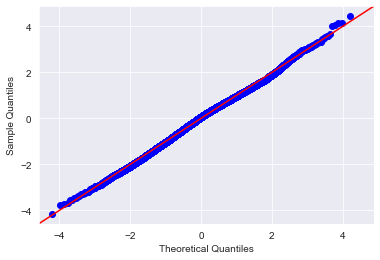

In [39]:
res = fsm_results1.resid # residuals
fig = sm.qqplot(res, stats.t, fit=True, line="45")
plt.show()

## Homoscedasticity  for Model 1:

Linear regression assumes that the variance of the dependent variable is homogeneous across different values of the independent variables. 

We can visualize this by looking at the predicted life expectancy vs. the residuals.

The null hypothesis is homoscedasticity, alternative hypothesis is heteroscedasticity. 

Thus returning a low p-value means that the current model violates the homoscedasticity assumption.


However, residual scatter plot is a figure that shows one axis for predicted scores and one axis for errors of prediction. The difference between the obtained Logged Home Prices and the Predicted Logged Home Prices and the variance of the residuals should be the same for all predicted scores (homoscedasticity).  

By looking at the scatter plot, this appears to be true since the scatter plot takes the (approximate) shape of a rectangular and the scores appear to be concentrated in the center (about the 0 point). 

In [40]:
y = fsm_df1["price_log"]
y_hat = fsm_results1.predict()

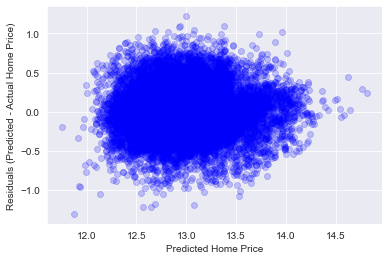

In [41]:
fig2, ax2 = plt.subplots()
ax2.set(xlabel="Predicted Home Price",
        ylabel="Residuals (Predicted - Actual Home Price)")
ax2.scatter(x = y_hat, y = y_hat-y, color = "blue", alpha=0.2);

In [42]:
lm, lm_p_value, fvalue, f_p_value = het_breuschpagan(y-y_hat, fsm_df1[['sqft_living_log',
                          'sqft_lot15_log',
                          'sqft_living15_log',
                          'bedrooms_scaled',
                          'bathrooms_scaled',
                          'floors_scaled',
                          'waterfront_scaled',
                          'view_scaled',
                          'condition_scaled',
                          'grade_scaled',
                          'age_scaled',
                          'year_sold_scaled',
                          'renovated_scaled',
                          'month_sold_scaled']])
print("Lagrange Multiplier p-value:", lm_p_value)
print("F-statistic p-value:", f_p_value)

Lagrange Multiplier p-value: 3.414129538259718e-42
F-statistic p-value: 1.7834464040640864e-42


## Independence for Model 1:

You might have noticed in the regression output that there was a warning about the condition number being high. 

The condition number is a measure of stability of the matrix used for computing the regression and a number above 30 can indicate strong multicollinearity. 

Our Condition Number output was 1.72e+21

The VIF metrics is extremely high for renovated_scaled, which means that there is stronger multicollinearity. However, the majority of the logged and scaled variables have still not exceeded the threshold of 5.

In [43]:
rows = fsm_df1[['sqft_living_log',
                          'sqft_lot15_log',
                          'sqft_living15_log',
                          'bedrooms_scaled',
                          'bathrooms_scaled',
                          'floors_scaled',
                          'waterfront_scaled',
                          'view_scaled',
                          'condition_scaled',
                          'grade_scaled',
                          'age_scaled',
                          'year_sold_scaled',
                          'renovated_scaled',
                          'month_sold_scaled']].values

vif_df = pd.DataFrame()
vif_df["VIF"] = [variance_inflation_factor(rows, i) for i in range(14)]
vif_df["feature"] = ['sqft_living_log',
                          'sqft_lot15_log',
                          'sqft_living15_log',
                          'bedrooms_scaled',
                          'bathrooms_scaled',
                          'floors_scaled',
                          'waterfront_scaled',
                          'view_scaled',
                          'condition_scaled',
                          'grade_scaled',
                          'age_scaled',
                          'year_sold_scaled',
                          'renovated_scaled',
                          'month_sold_scaled']

vif_df

,VIF,feature
0,4.708852,sqft_living_log
1,1.484916,sqft_lot15_log
2,2.733361,sqft_living15_log
3,1.770429,bedrooms_scaled
4,3.053378,bathrooms_scaled
5,1.778727,floors_scaled
6,1.000398,waterfront_scaled
7,1.060852,view_scaled
8,1.191782,condition_scaled
9,2.734574,grade_scaled


# Summary

**This model had 14 input features: Sqft_living_log, Sqft_lot15_log, Sqft_living15_log, Bedrooms_scaled, Bathrooms_scaled , Floors_scaled, Waterfront_scaled, View_scaled, Condition_scaled, Grade_scaled, Age_scaled, Year_sold_scaled, Renovated_scaled and Month_sold_scaled.**


**It had an r-squared of 0.606. This model did not violate the linearity assumption (p = 0.5559), but it did violate the normality (p < 0.001) and homoscedasticity (p < 0.001) assumptions. Based on the variance inflaction factor metric, it did not violate the independence assumption for 13 of the features.**


**However, the Q-Q Plot shows the points falling along a straight line, which provide strong evidence that these numbers truly did come from a normal distribution.**


**Finally, the residual scatter plot appears to meet homoscedasticity assumption since the scores appear to be concentrated in the center (about the 0 point) and distributed in a rough rectangularly pattern.**


We are able to address the following questions from above:

*1. Do the various predicting factors which have been chosen initially really affect the home prices?* 

    - With 14 features we are able to explain about 61% of the variance in home prices in
      house sales, from a northwestern county. This indicates that these factors truly are
      explanatory. More analysis is required to understand how much additional explanatory
      power would be provided by incorporating features with less multicollinearity.


*2. Which top factors might increase the estimated value of a home, for the buyer or the seller, and by what amount?*

The three factors that would increase value of a home:

    1. Square Foot Living 15
        - The square footage of interior housing living space for the nearest 15 neighbors
        - For each additional 1% increase in the square footage of interior housing living space for the nearest 15
          neighbors, we expect a home's price to increase by a percentage change of 0.3248.
          
    2. Square Foot Living
        - The footage of the home
        - For each additional 1% increase in footage of the home's, we expect a home's price to increase by a
          percentage change of 0.3112.
        
    3. Grade
        - The overall grade given to the housing unit, based on the King County grading system
        - For each additional 1% percent increase in the standard deviation of the overall grade given to the 
          housing unit, we expect a home's price to increase by a percentage change of 0.2389.



*3. Which top factors might decrease the estimated value of a home, for the buyer or the seller, and by what amount?*

The top three factors that would decrease value of a home:
	
    1. Renovated:
        - If the home was renovated within the last 10 years, it received a 1. If not, it
          received a 0.
        - For each additional 1% percent increase in the standard deviation of renovation, 
          we expect a home's price to decrease by a percentage change of -2.4270.
        
    2. Square Lot 15:
        - The square footage of the land lots of the nearest 15 neighbors
        - For each additional 1% increase in square footage of the land lots of the nearest 15 neighbors, 
          we expect a home's price to decrease by a percentage change of -0.0949.
          
    3. Bedrooms: 
         - The number of of Bedrooms per House
         - For each additional 1% percent increase in the standard deviation for bedrooms, 
           we expect a home's price to decrease by a percentage change of -0.0337.